<a href="https://colab.research.google.com/github/fordfelicity/EXPERT-FORD/blob/master/Damaris_Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install shutup

In [2]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import shutup; shutup.please()
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

#Importing sklearn modules
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Datafinal DAMARIS.csv")

In [4]:
df.head()

,divid,province,district,division,Year,month,rainfall,elevation,slope,clay,humidity,Case_Outbreak_RVF
0,30402,COAST,MOMBASA,KISAUNI,2007,January,-10.077769,19.250099,89.911404,25.494737,74.000000,1
1,30402,COAST,MOMBASA,KISAUNI,2006,February,-4.278886,19.250099,89.911404,25.494737,74.000000,1
2,30402,COAST,MOMBASA,KISAUNI,1981,November,-0.424976,19.250099,89.911404,25.494737,74.000000,1
3,30402,COAST,MOMBASA,KISAUNI,1981,August,2.004479,19.250099,89.911404,25.494737,74.000000,1
4,30302,COAST,LAMU,HINDI,2007,January,-3.609389,23.205099,88.869557,28.546445,70.035793,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180288 entries, 0 to 180287
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   divid              180288 non-null  int64  
 1   province           180288 non-null  object 
 2   district           180288 non-null  object 
 3   division           180288 non-null  object 
 4   Year               180288 non-null  int64  
 5   month              180288 non-null  object 
 6   rainfall           180288 non-null  float64
 7   elevation          180288 non-null  float64
 8   slope              180288 non-null  float64
 9   clay               180288 non-null  float64
 10  humidity           180288 non-null  float64
 11  Case_Outbreak_RVF  180288 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 16.5+ MB


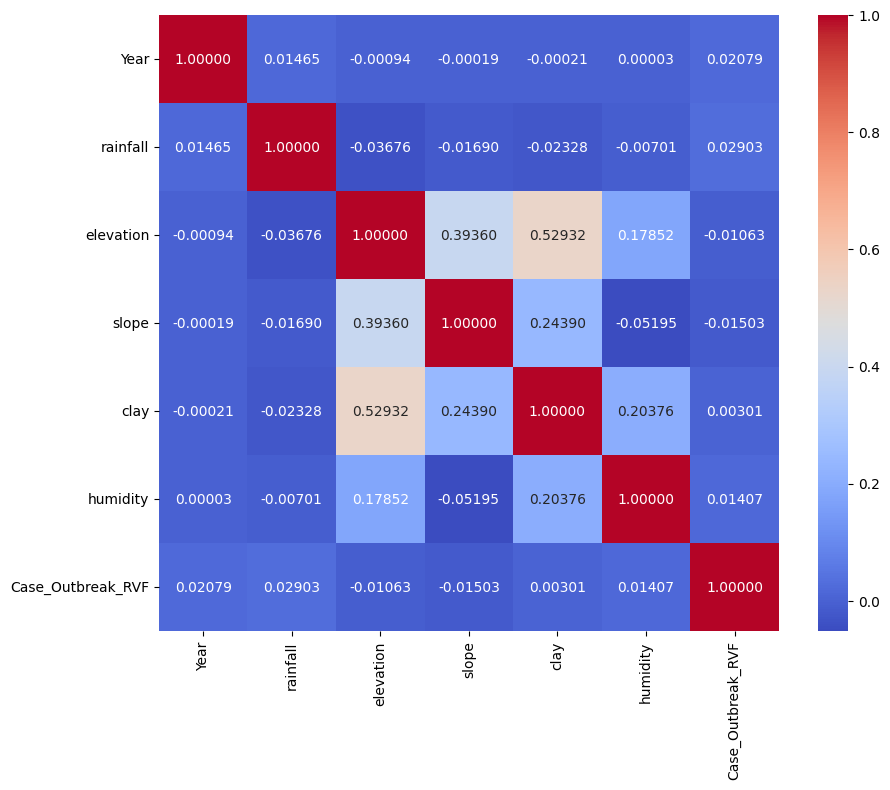

In [6]:
# Select continuous variables only
continuous_cols = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
continuous_cols.remove('divid')

# Create a correlation matrix
correlation_matrix = df[continuous_cols].corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".5f")
plt.show()

In [7]:
correlation_matrix.style.format("{:.5f}".format)

,Year,rainfall,elevation,slope,clay,humidity,Case_Outbreak_RVF
Year,1.00000,0.01465,-0.00094,-0.00019,-0.00021,0.00003,0.02079
rainfall,0.01465,1.00000,-0.03676,-0.01690,-0.02328,-0.00701,0.02903
elevation,-0.00094,-0.03676,1.00000,0.39360,0.52932,0.17852,-0.01063
slope,-0.00019,-0.01690,0.39360,1.00000,0.24390,-0.05195,-0.01503
clay,-0.00021,-0.02328,0.52932,0.24390,1.00000,0.20376,0.00301
humidity,0.00003,-0.00701,0.17852,-0.05195,0.20376,1.00000,0.01407
Case_Outbreak_RVF,0.02079,0.02903,-0.01063,-0.01503,0.00301,0.01407,1.00000


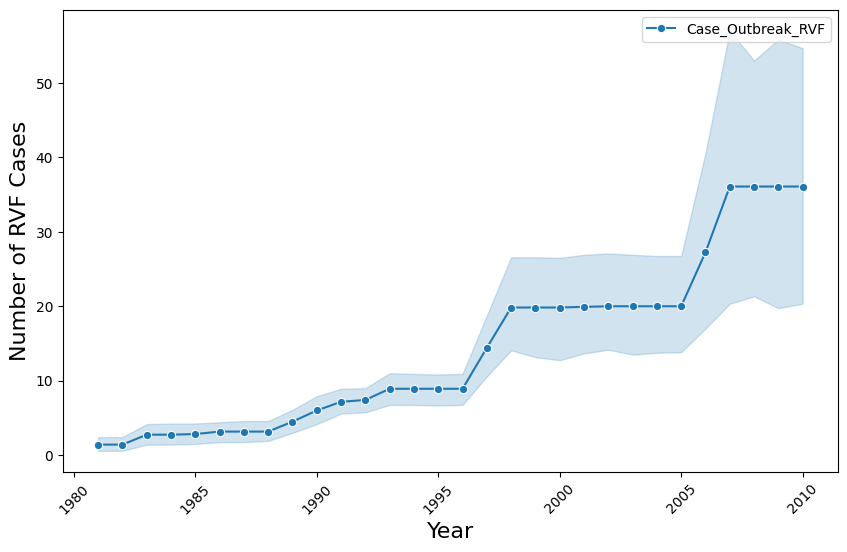

In [8]:
# prompt: plot a graph for rvf cases across years in column and based on months in the other side , one is lcummulative line chart the other is bar chart  , remember to order months from january to December

import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Datafinal DAMARIS.csv")


# Group the data by year and month
grouped_data = df.groupby(['Year', 'month']).agg({'Case_Outbreak_RVF': 'sum'})

# Create a new DataFrame for the grouped data
new_df = grouped_data.unstack()

# Plot the line chart for cumulative cases
plt.figure(figsize=(10, 6))
sns.lineplot(data=new_df.cumsum(), markers=True, dashes=False)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of RVF Cases',fontsize=16)
plt.xticks(rotation=45)
plt.show()


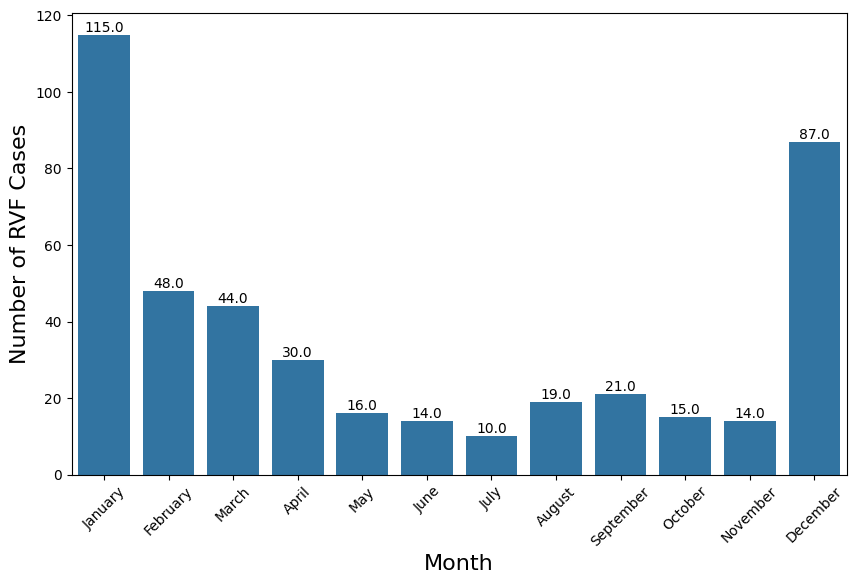

In [9]:
sorted_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Get the case counts for each month
cases_by_month = df.groupby('month')['Case_Outbreak_RVF'].sum()

# Sort the case counts by month
cases_by_month = cases_by_month.reindex(sorted_months)
# Get the case counts for each month
cases_by_month = df.groupby('month')['Case_Outbreak_RVF'].sum()

# Sort the case counts by month
cases_by_month = cases_by_month.reindex(sorted_months)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=cases_by_month.index, y=cases_by_month.values)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Number of RVF Cases',fontsize=16)
plt.xticks(rotation=45)

# Add the number of cases on top of each bar
for i, bar in enumerate(plt.gca().patches):
  plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 str(bar.get_height()), ha='center', va='bottom')

# Add creative patterns to the bars
for i, bar in enumerate(plt.gca().patches):
  bar.set_hatch('/') if i % 2 == 3 else bar.set_hatch('1')

plt.show()


In [10]:
# Application of all Machine Learning methods
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGBoost', XGBClassifier()))

In [11]:
# Drop any non-numeric columns that won't be used for modeling
df.drop(['divid', 'province', 'district', 'division', 'Year', 'month'], axis=1, inplace=True)

In [12]:
# Creating variables for analysis
x=df.iloc[:,: -1]
y=df.iloc[:,-1]

In [13]:
# Splitting train and split data
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [14]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)


XGBoost: 0.997657 (0.000382)


In [15]:
for name, cv_results in zip(names, results):
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.997670 (0.000397)
LDA: 0.997587 (0.000372)
KNN: 0.997670 (0.000397)
CART: 0.995202 (0.000449)
NB: 0.990189 (0.000757)
SVM: 0.997670 (0.000397)
RF: 0.996249 (0.000441)
XGBoost: 0.997657 (0.000382)


In [16]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Loop through each model in the list
for name, model in models:
    # Fit the model
    model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = model.predict(x_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred, pos_label=1)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print or store the metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("\n")

Model: LR
Accuracy: 0.9973098896222752
Sensitivity: 0.0
Specificity: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


Model: LDA
Accuracy: 0.9972266903322425
Sensitivity: 0.0
Specificity: 0.9999165762909819
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


Model: KNN
Accuracy: 0.9973098896222752
Sensitivity: 0.0
Specificity: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


Model: CART
Accuracy: 0.994841644017971
Sensitivity: 0.020618556701030927
Specificity: 0.9974694808264509
Precision: 0.021505376344086023
Recall: 0.020618556701030927
F1 Score: 0.021052631578947368


Model: NB
Accuracy: 0.9899606190027178
Sensitivity: 0.010309278350515464
Specificity: 0.9926030978003949
Precision: 0.003745318352059925
Recall: 0.010309278350515464
F1 Score: 0.005494505494505494


Model: SVM
Accuracy: 0.9973098896222752
Sensitivity: 0.0
Specificity: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


Model: RF
Accuracy: 0.9956736369182982
Sensitivity: 0.020618556701030927
Specificity: 0.9983037179166319
Precision: 0.0

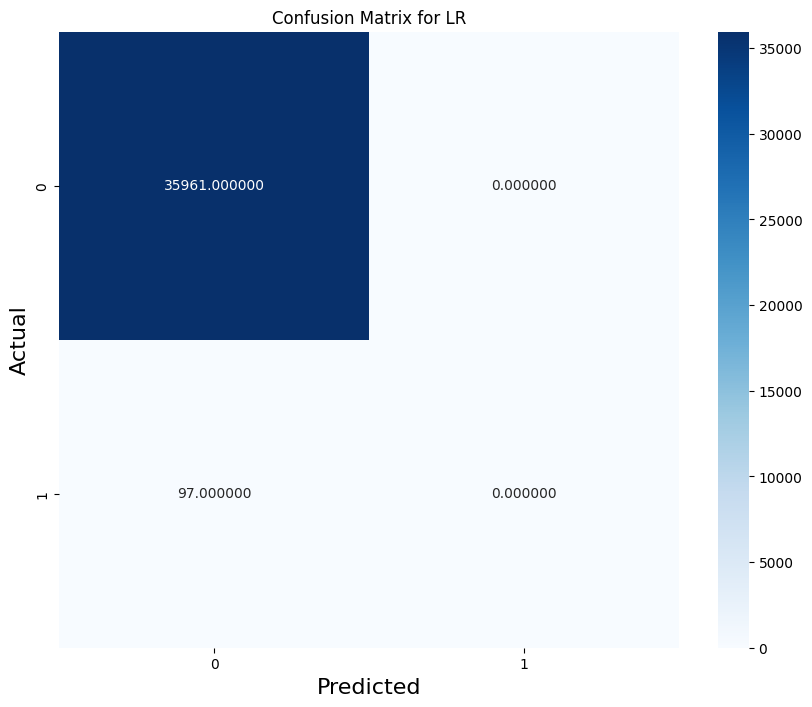

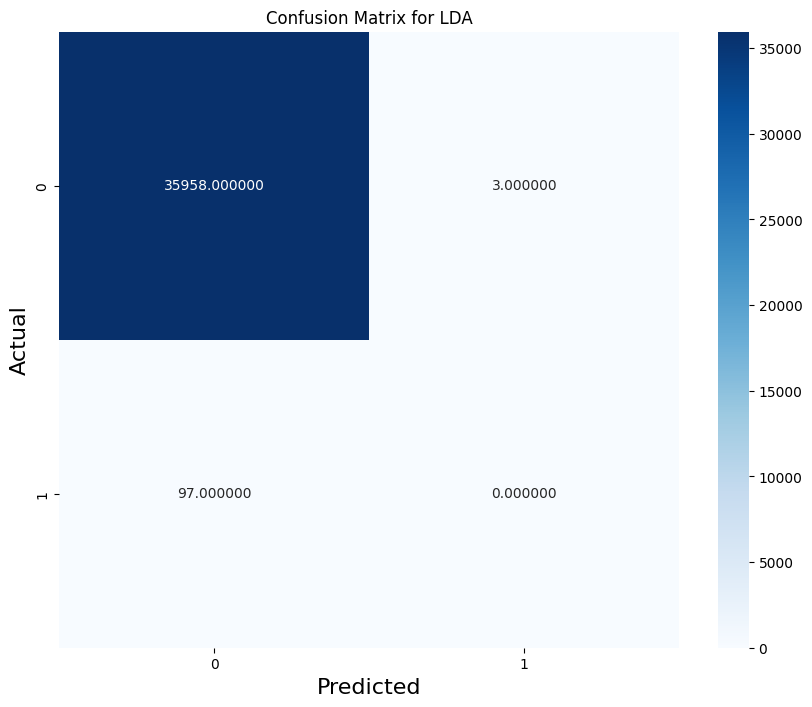

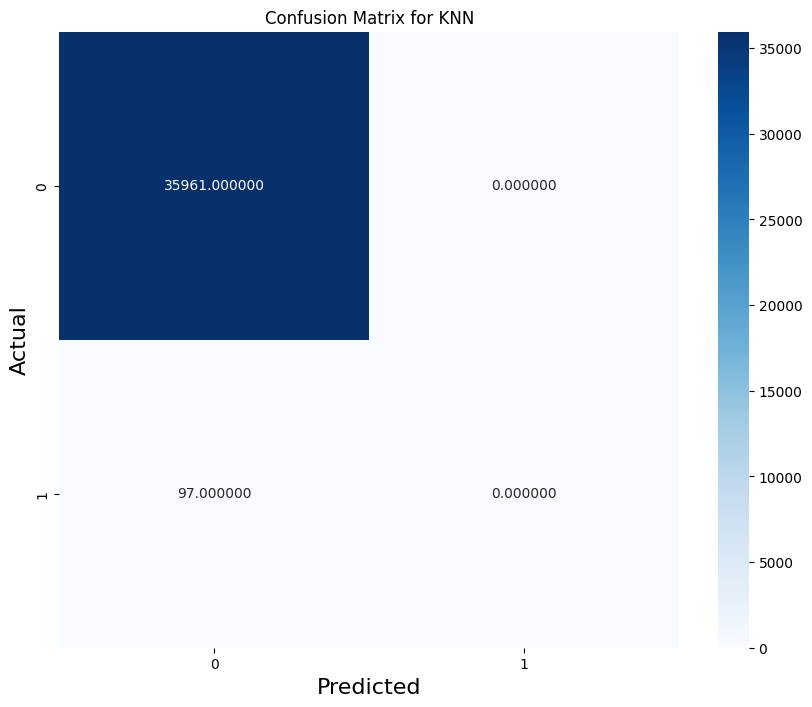

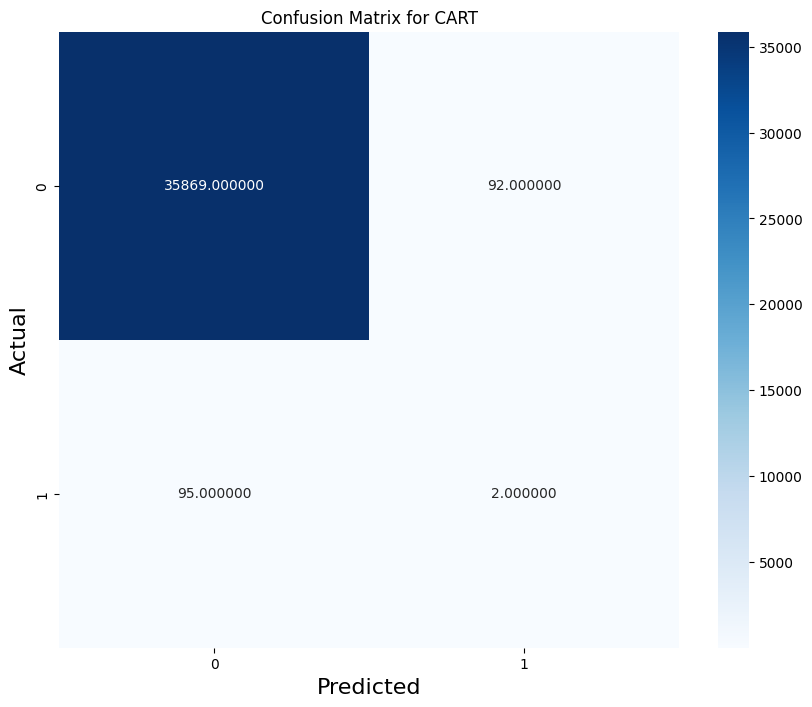

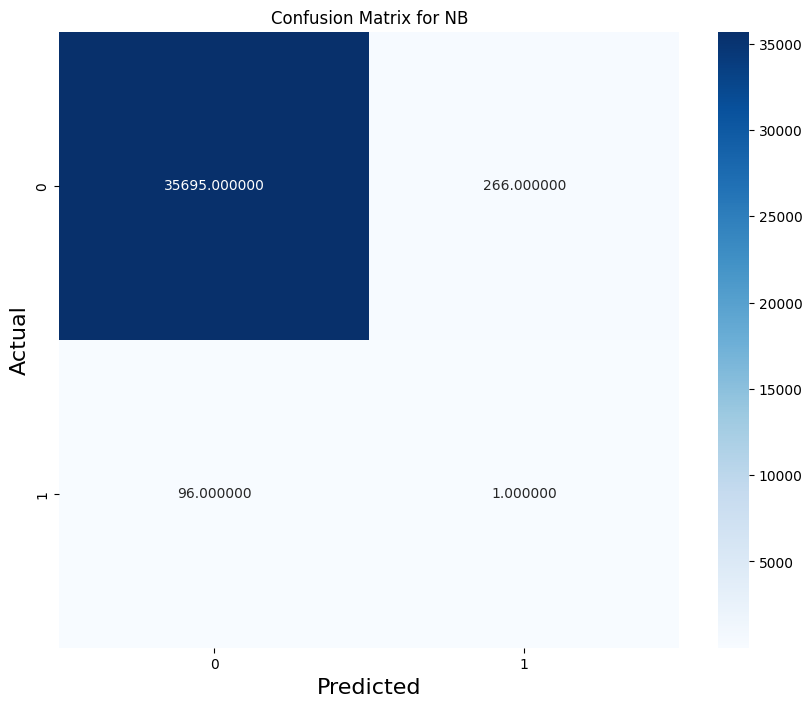

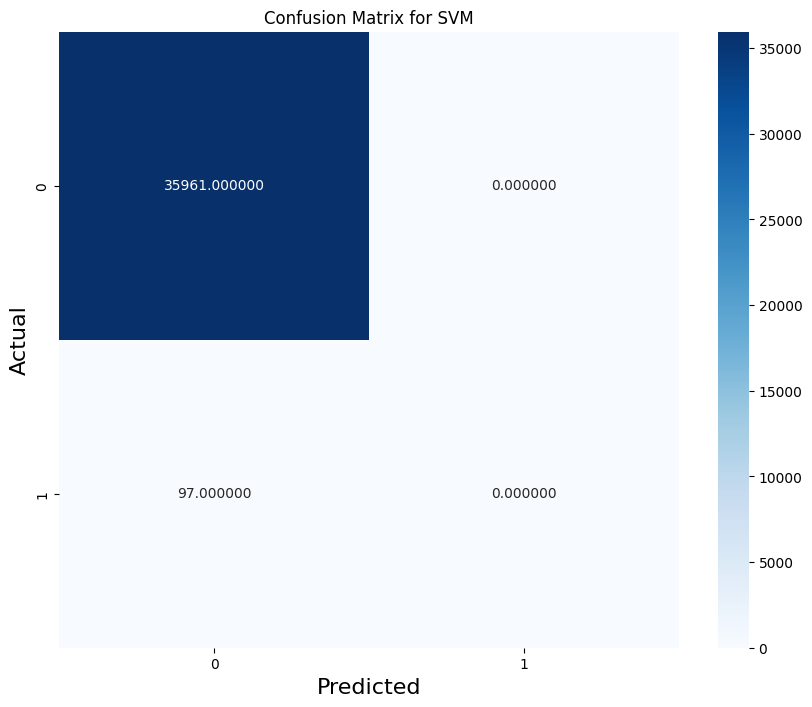

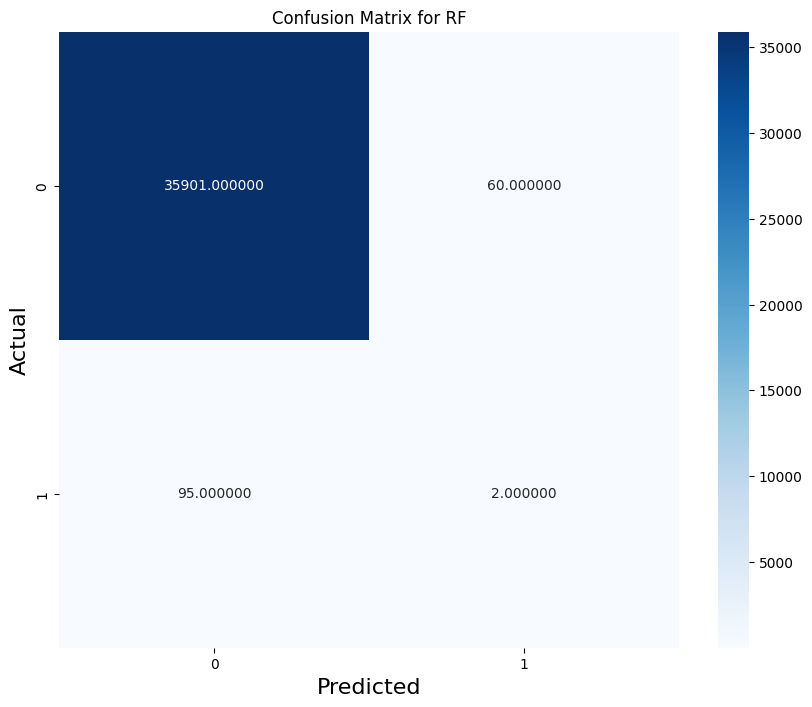

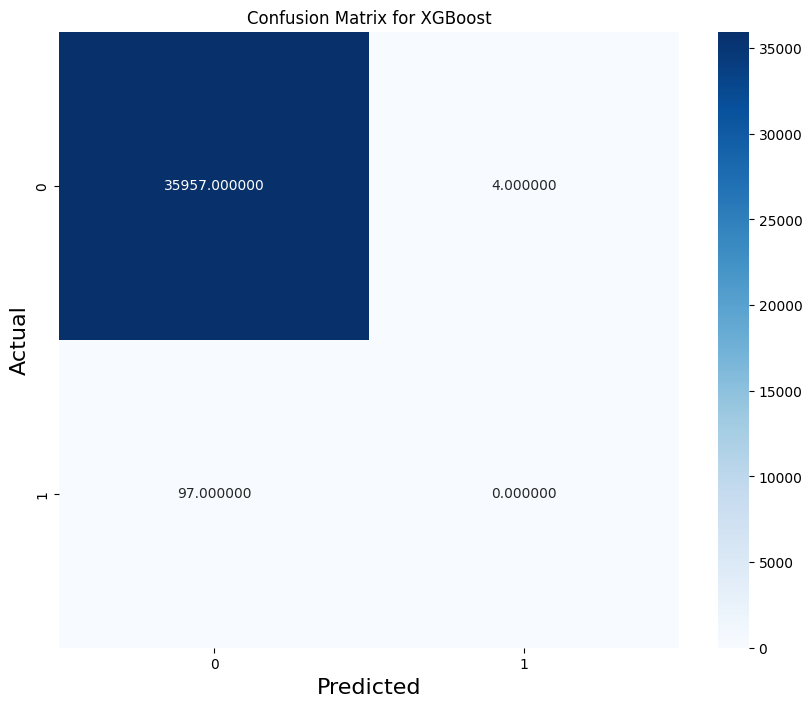

In [17]:
# Loop through each model in the list
for name, model in models:
    # Fit the model
    model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = model.predict(x_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred, pos_label=1)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="f", cmap="Blues")
    plt.xlabel("Predicted",fontsize=16)
    plt.ylabel("Actual",fontsize=16)
    plt.title(f"Confusion Matrix for {name}")
    plt.show()
    print("\n")


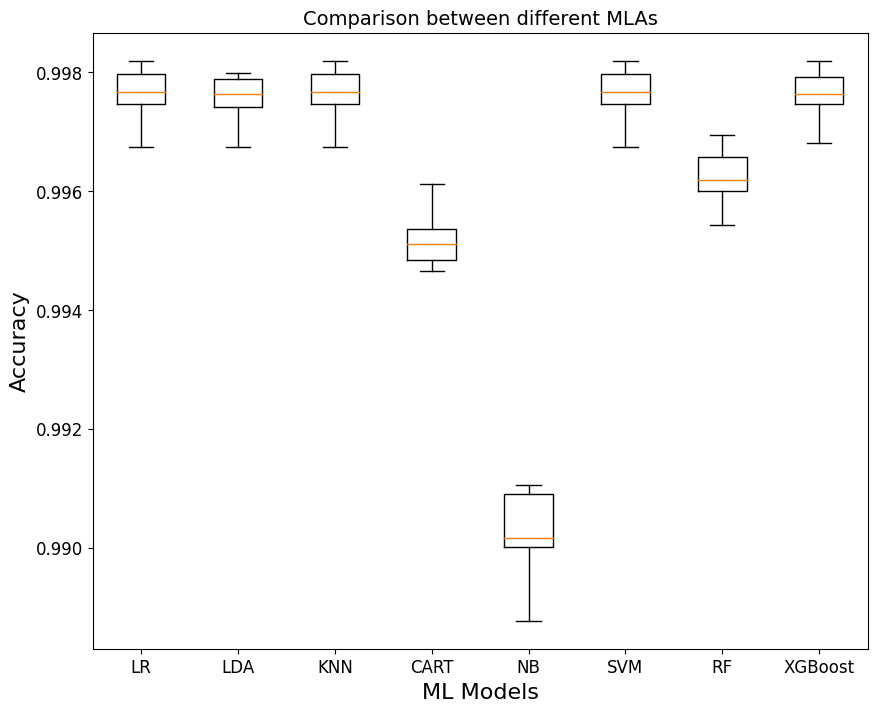

In [18]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('ML Models', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Comparison between different MLAs', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()
plt.show()

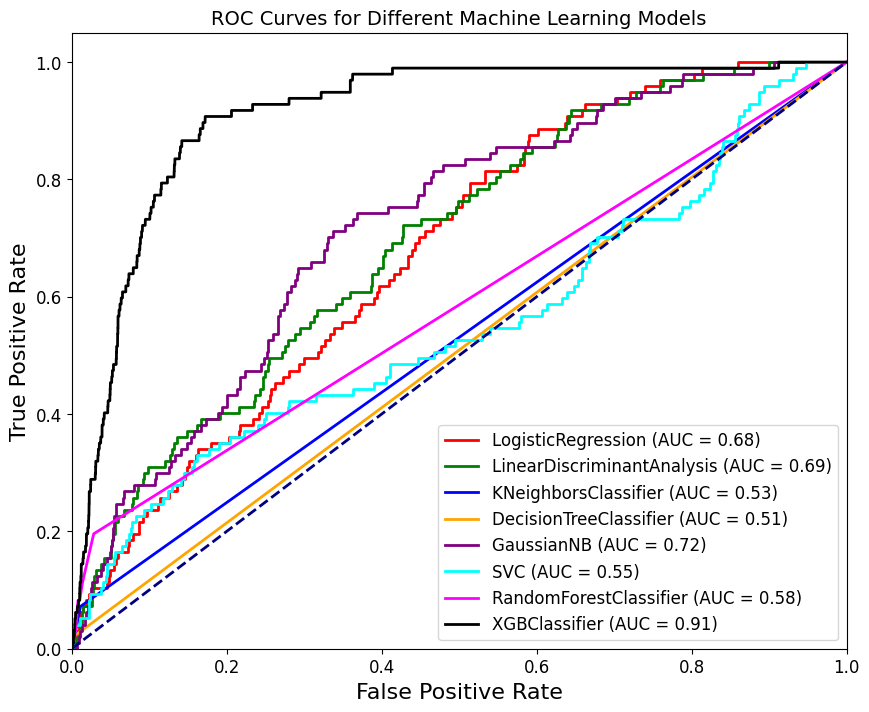

In [19]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Initialize dictionaries to store ROC curve data for each model
fpr_dict = {}
tpr_dict = {}
roc_auc_dict = {}

# Define a list of models
models = [LogisticRegression(), LinearDiscriminantAnalysis(), KNeighborsClassifier(), DecisionTreeClassifier(), GaussianNB(), SVC(probability=True), RandomForestClassifier(), XGBClassifier()]

# Loop through each model and calculate ROC curve data
for model in models:
    model.fit(x_train, y_train)
    y_score = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Store ROC curve data for each model
    fpr_dict[model.__class__.__name__] = fpr
    tpr_dict[model.__class__.__name__] = tpr
    roc_auc_dict[model.__class__.__name__] = roc_auc

# Plot ROC curves for all models in one figure
plt.figure(figsize=(10, 8)) # Increase figure size
lw = 2
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'black']

for i, (model_name, fpr) in enumerate(fpr_dict.items()):
    plt.plot(fpr, tpr_dict[model_name], color=colors[i % len(colors)], lw=lw, label=f'{model_name} (AUC = {roc_auc_dict[model_name]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curves for Different Machine Learning Models', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

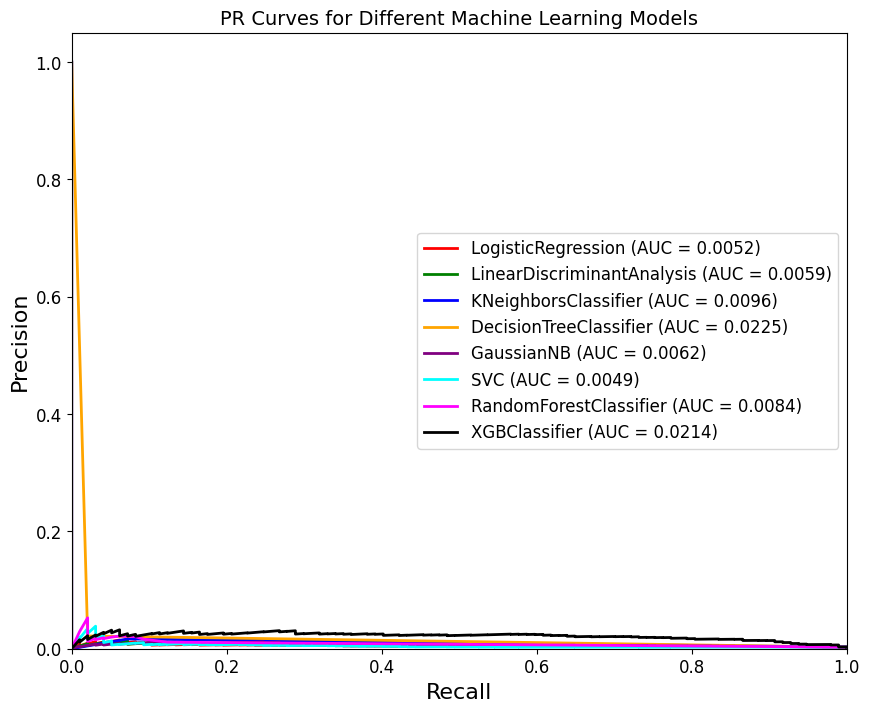

In [20]:
# prompt: plot a pr curve for all models

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# Initialize dictionaries to store PR curve data for each model
precision_dict = {}
recall_dict = {}
pr_auc_dict = {}

# Define a list of models
models = [LogisticRegression(), LinearDiscriminantAnalysis(), KNeighborsClassifier(), DecisionTreeClassifier(), GaussianNB(), SVC(probability=True), RandomForestClassifier(), XGBClassifier()]

# Loop through each model and calculate PR curve data
for model in models:
    model.fit(x_train, y_train)
    y_score = model.predict_proba(x_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    pr_auc = auc(recall, precision)

    # Store PR curve data for each model
    precision_dict[model.__class__.__name__] = precision
    recall_dict[model.__class__.__name__] = recall
    pr_auc_dict[model.__class__.__name__] = pr_auc

# Plot PR curves for all models in one figure
plt.figure(figsize=(10, 8)) # Increase figure size
lw = 2
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'black']

for i, (model_name, precision) in enumerate(precision_dict.items()):
    plt.plot(recall_dict[model_name], precision, color=colors[i % len(colors)], lw=lw, label=f'{model_name} (AUC = {pr_auc_dict[model_name]:.4f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('PR Curves for Different Machine Learning Models', fontsize=14)
plt.legend(loc="center right", fontsize=12) # Move legend to the middle right
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()


In [21]:

# Print results for all models ranked by PR AUC
models = sorted(pr_auc_dict.items(), key=lambda item: item[1], reverse=True)

for i, (model_name, pr_auc) in enumerate(models):
    print(f"{i+1}. {model_name}: {pr_auc:.4f}")


1. DecisionTreeClassifier: 0.0225
2. XGBClassifier: 0.0214
3. KNeighborsClassifier: 0.0096
4. RandomForestClassifier: 0.0084
5. GaussianNB: 0.0062
6. LinearDiscriminantAnalysis: 0.0059
7. LogisticRegression: 0.0052
8. SVC: 0.0049


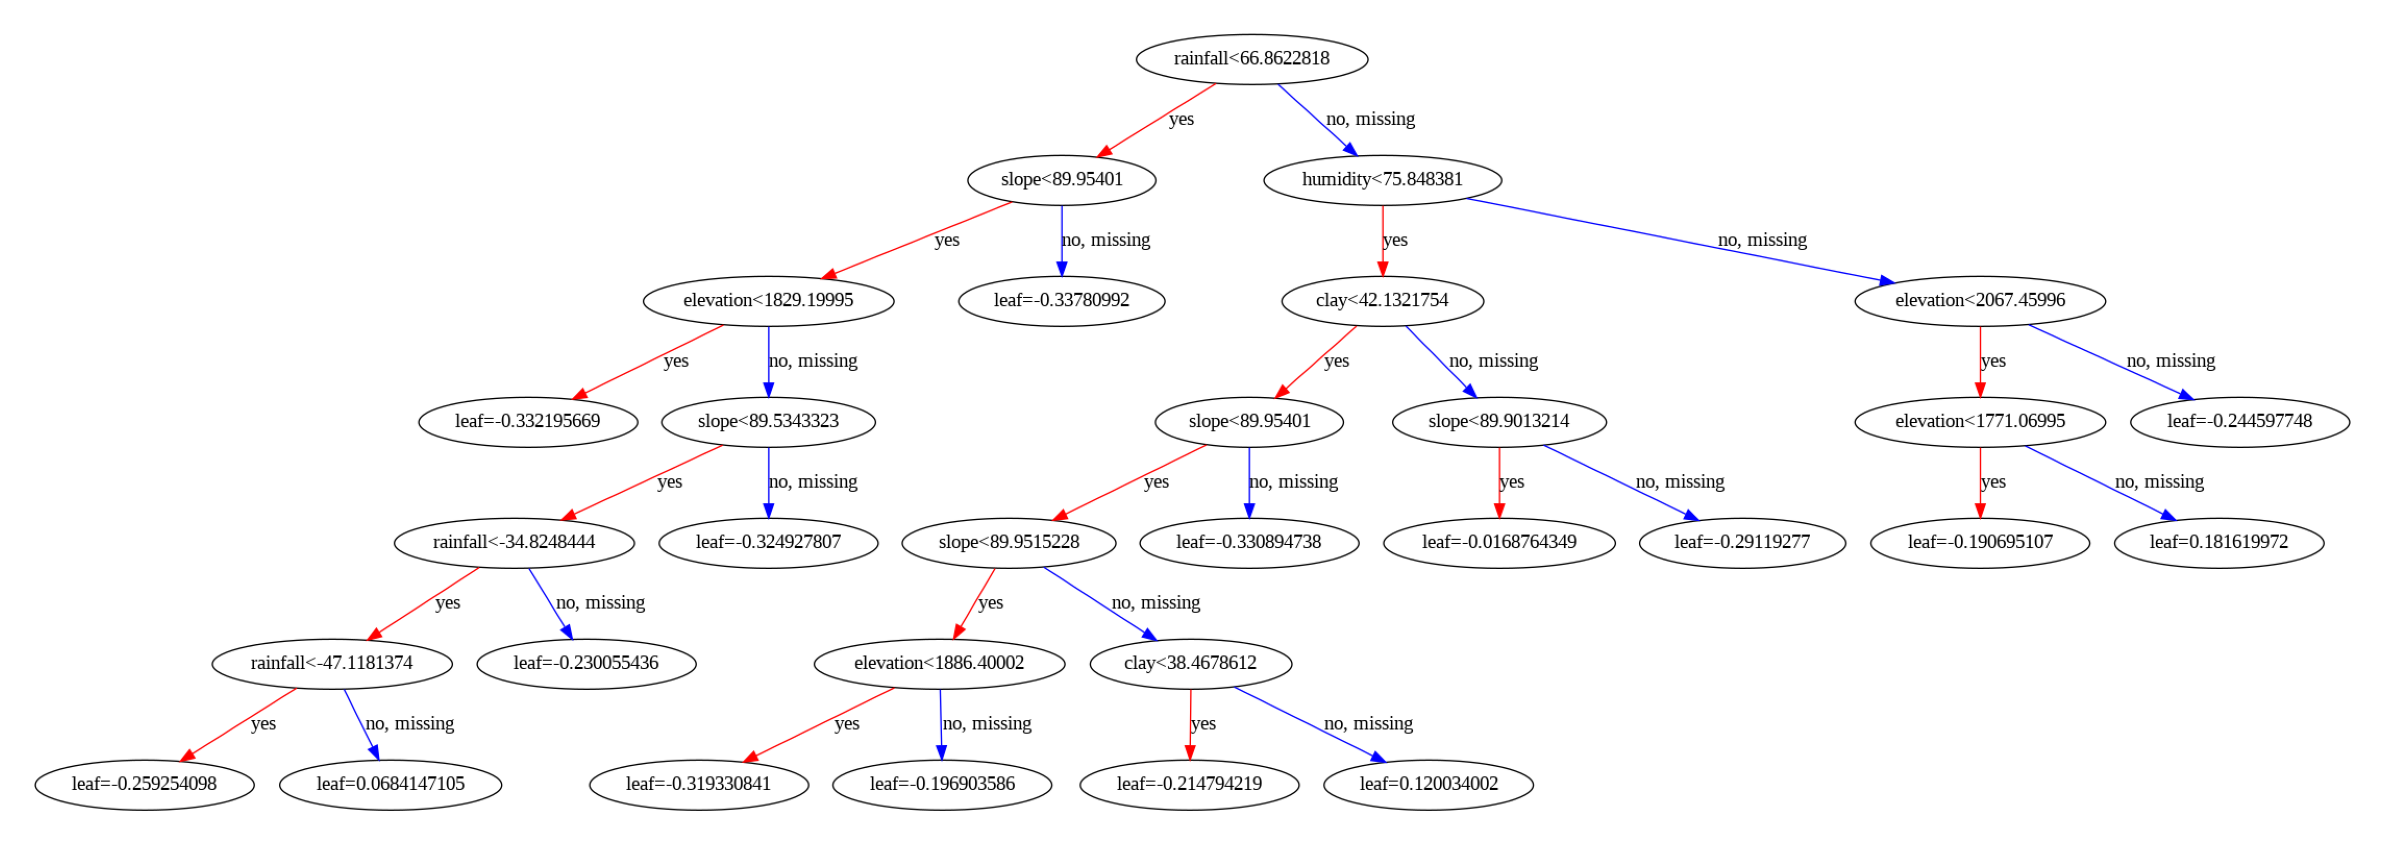

In [22]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

model = XGBClassifier()
model.fit(x_train, y_train)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 8), dpi=300)
plot_tree(model, ax=axes, feature_names = x_train.columns)
plt.show()
